In [107]:
import sys
sys.path.append('/home/ZhiLi/CRESTHH')
from cresthh.anuga import SWW_plotter
import numpy as np
import pandas as pd
%matplotlib inline
import geopandas as gpd
from cresthh.utils import flowAreaCalc as flow_area

# Allow inline jshtml animations
from matplotlib import rc
rc('animation', html='jshtml')

In [8]:
dr= pd.date_range('20170825000000','20170826000000', freq='120S')

In [51]:
CoupledSplotter= SWW_plotter('coupled_10m_modified_mesh.sww', start_time=pd.to_datetime('20170825000000'))
NonCoupledSplotter= SWW_plotter('nonCoupled_10m_modified_mesh.sww', start_time=pd.to_datetime('20170825000000'))

Figure files for each frame will be stored in _plot
Figure files for each frame will be stored in _plot


In [29]:
for i, time in enumerate(splotter.time):
    if i%30==0:
        splotter.save_soil_frame(frame=i)
    else:
        pass

In [30]:
splotter.make_soil_animation()

In [11]:
OUTLET= (290245.6, 3292717.0)

In [12]:
xc= splotter.xc+ splotter.xllcorner
yc= splotter.yc+ splotter.yllcorner
iloc= np.argmin( (xc-OUTLET[0])**2 + (yc-OUTLET[1])**2 )

<Figure size 1080x432 with 0 Axes>

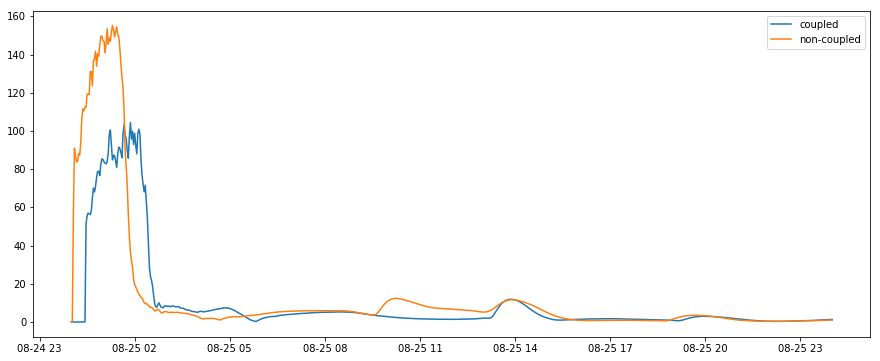

In [52]:
plt.figure(figsize=(15,6))
plt.plot(dr, CoupledSplotter.speed[:,iloc]*300*0.8, label='coupled')
plt.plot(dr, NonCoupledSplotter.speed[:,iloc]*300*0.8, label='non-coupled')
plt.legend()

<Figure size 1080x432 with 0 Axes>

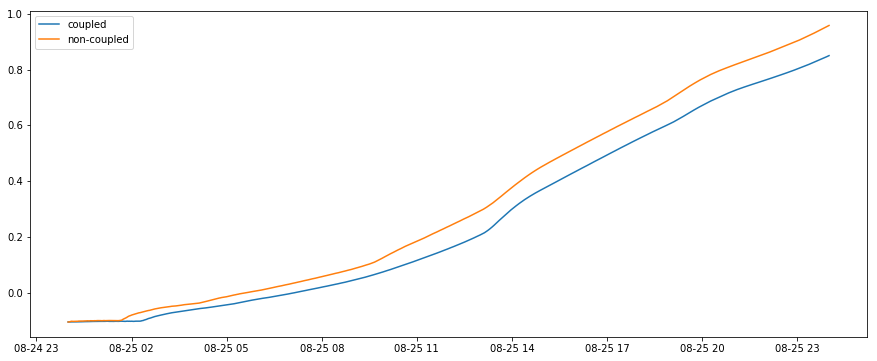

In [53]:
plt.figure(figsize=(15,6))
plt.plot(dr, CoupledSplotter.stage[:,iloc], label='coupled')
plt.plot(dr, NonCoupledSplotter.stage[:,iloc], label='non-coupled')
plt.legend()

In [4]:
splotter= SWW_plotter('nonCoupled_10m_modified_mesh.sww', start_time=pd.to_datetime('20170825000000'))

Figure files for each frame will be stored in _plot


In [17]:
?splotter.save_longitudinal_frame

Signature: splotter.save_longitudinal_frame(pnts, figsize=(15, 6), dpi=160, frame=-1)
Docstring: <no docstring>
File:      ~/CRESTHH/cresthh/anuga/utilities/animate.py
Type:      instancemethod


In [19]:
boundary= gpd.read_file('/home/ZhiLi/CRESTHH/data/HoustonCase/longest_reach/longest_reach.shp')

In [26]:
for i, time in enumerate(splotter.time):
    if i%30==0:
        splotter.save_longitudinal_frame(np.array(boundary.geometry[0].coords), frame=i)
    else:
        pass

In [27]:
splotter.make_longitudinal_animation()

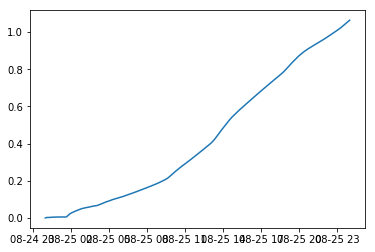

In [13]:
plt.plot(dr, splotter.depth[:,iloc])

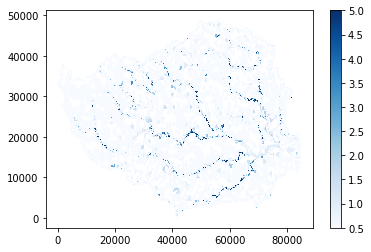

In [40]:
plt.tripcolor(splotter.triang, facecolors=splotter.depth.max(axis=0), vmin=0.5, vmax=5, cmap='Blues')
plt.colorbar()

In [42]:
from netCDF4 import Dataset

In [43]:
nc= Dataset('coupled_10m_modified_mesh.sww')

In [50]:
new_nc= Dataset('test.sww', 'w')

In [ ]:
new_nc.createVariable('depth', )

In [48]:
nc['depth']= nc['stage'][:] - nc['elevation'][:]

TypeError: 'netCDF4._netCDF4.Dataset' object does not support item assignment

In [56]:
crossSection= gpd.read_file('/home/ZhiLi/CRESTHH/data/HoustonCase/outlet_cross_section/outlet_cross_section.shp')

In [66]:
depth=CoupledSplotter.depth[-1,iloc]

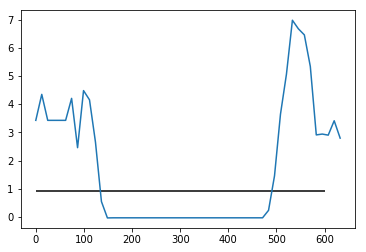

In [85]:
plt.plot(np.arange(0,12.397483*52,12.397483), crossSection.Value)
plt.hlines(0.92, 0,600)

In [99]:
area= ((depth - crossSection.Value[crossSection.Value- depth<0])* 12.397483).sum()

In [104]:
area

344.388704235467

In [108]:
flow_area(crossSection, depth)

344.38870061398364

In [86]:
import scipy.integrate as integrate